<a href="https://colab.research.google.com/github/SiracencoSerghei/linear_algebra/blob/main/2.2_matrixMultiplication/2_2_10_matrix_NORM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np

---
# Matrix Norms
---

In [2]:
# Create a matrix
A = np.array([ [1,2,3], [4,5,6], [7,7,9] ])

# optional orthogonal matrix to show that 2-norm is 1
Q,R = np.linalg.qr(np.random.randn(5,5))
# A = Q

# Frobenius norm
normFrob = np.linalg.norm(A,'fro')

# induced 2-norm
normInd2 = np.linalg.norm(A,2)
# note: computed as below
lamb = np.sqrt( np.max(np.linalg.eig(A.T@A)[0]) )

# schatten p-norm
p = 2
s = np.linalg.svd(A)[1] # get singular values
normSchat = np.sum(s**p)**(1/p)


# % show all norms for comparison
print(normFrob,normSchat,normInd2)


16.431676725154983 16.431676725154986 16.392007827749776


---
# Conditions and proof of self-adjoint operator
---

In [12]:
m = 5

A = np.random.randn(m,m)
print(A), print(' ')
# A = A@A.T
print(A), print(' ')

v = np.random.randn(m)
w = np.random.rand(m)

print(v), print(' ')
print(w), print(' ')
y = A@v
x = A@w
print(A@v), print(' ')

diff = np.dot(A@v, w) - np.dot(v, x)

print(diff)

[[ 0.64934191 -0.06448946 -0.85081674  0.50600696  1.08894355]
 [-0.62090777 -0.53008865 -0.32153877 -0.17113737  1.28486302]
 [ 1.76311926 -1.39589604 -0.32903916 -1.35681541 -1.86144431]
 [ 1.38067245  0.40056173 -0.1872519   0.71727225 -0.00924763]
 [ 0.25798334 -1.66321407 -1.05341786  1.50166389  1.17748709]]
 
[[ 0.64934191 -0.06448946 -0.85081674  0.50600696  1.08894355]
 [-0.62090777 -0.53008865 -0.32153877 -0.17113737  1.28486302]
 [ 1.76311926 -1.39589604 -0.32903916 -1.35681541 -1.86144431]
 [ 1.38067245  0.40056173 -0.1872519   0.71727225 -0.00924763]
 [ 0.25798334 -1.66321407 -1.05341786  1.50166389  1.17748709]]
 
[ 0.17474415  0.7413582  -0.55067747 -1.9827935  -1.46358509]
 
[0.47007068 0.33229107 0.4356667  0.76120761 0.13971456]
 
[-2.06288432 -1.8655977   4.86909716 -0.76732852 -5.30870477]
 
2.031273283387579


---
# Code challenge: Matrix asymmetry index
---

Goals for this code challenge:

Implement the matrix asymmetry index in code

Test on a (1) symmetric matrix, (2) skew-symmetric matrix, (") random matrix. Use the additive method to create random symmetric matrices.

Develop a formula that will proportionally mix a symmetric and skew-symmetric matrix.

Confirm that the formula works using random matrices.


[[-1.6  -0.6   0.86 -0.01  0.04]
 [-0.6   1.43  0.03 -0.21 -1.08]
 [ 0.86  0.03 -0.89  0.76  0.43]
 [-0.01 -0.21  0.76  0.6  -0.16]
 [ 0.04 -1.08  0.43 -0.16 -1.12]]
0.0
[[ 0.    0.28  0.29  0.44 -0.37]
 [-0.28  0.   -0.57 -1.3   0.6 ]
 [-0.29  0.57  0.    0.17 -0.  ]
 [-0.44  1.3  -0.17  0.   -0.32]
 [ 0.37 -0.6   0.    0.32  0.  ]]
1.0
[[-1.6  -0.32  1.15  0.43 -0.33]
 [-0.88  1.43 -0.54 -1.51 -0.48]
 [ 0.57  0.6  -0.89  0.93  0.43]
 [-0.45  1.08  0.59  0.6  -0.48]
 [ 0.41 -1.68  0.43  0.16 -1.12]]
0.5576048920786203
[[-0.16  0.19  0.35  0.4  -0.33]
 [-0.31  0.14 -0.51 -1.19  0.43]
 [-0.17  0.51 -0.09  0.23  0.04]
 [-0.4   1.15 -0.08  0.06 -0.3 ]
 [ 0.34 -0.65  0.05  0.27 -0.11]]


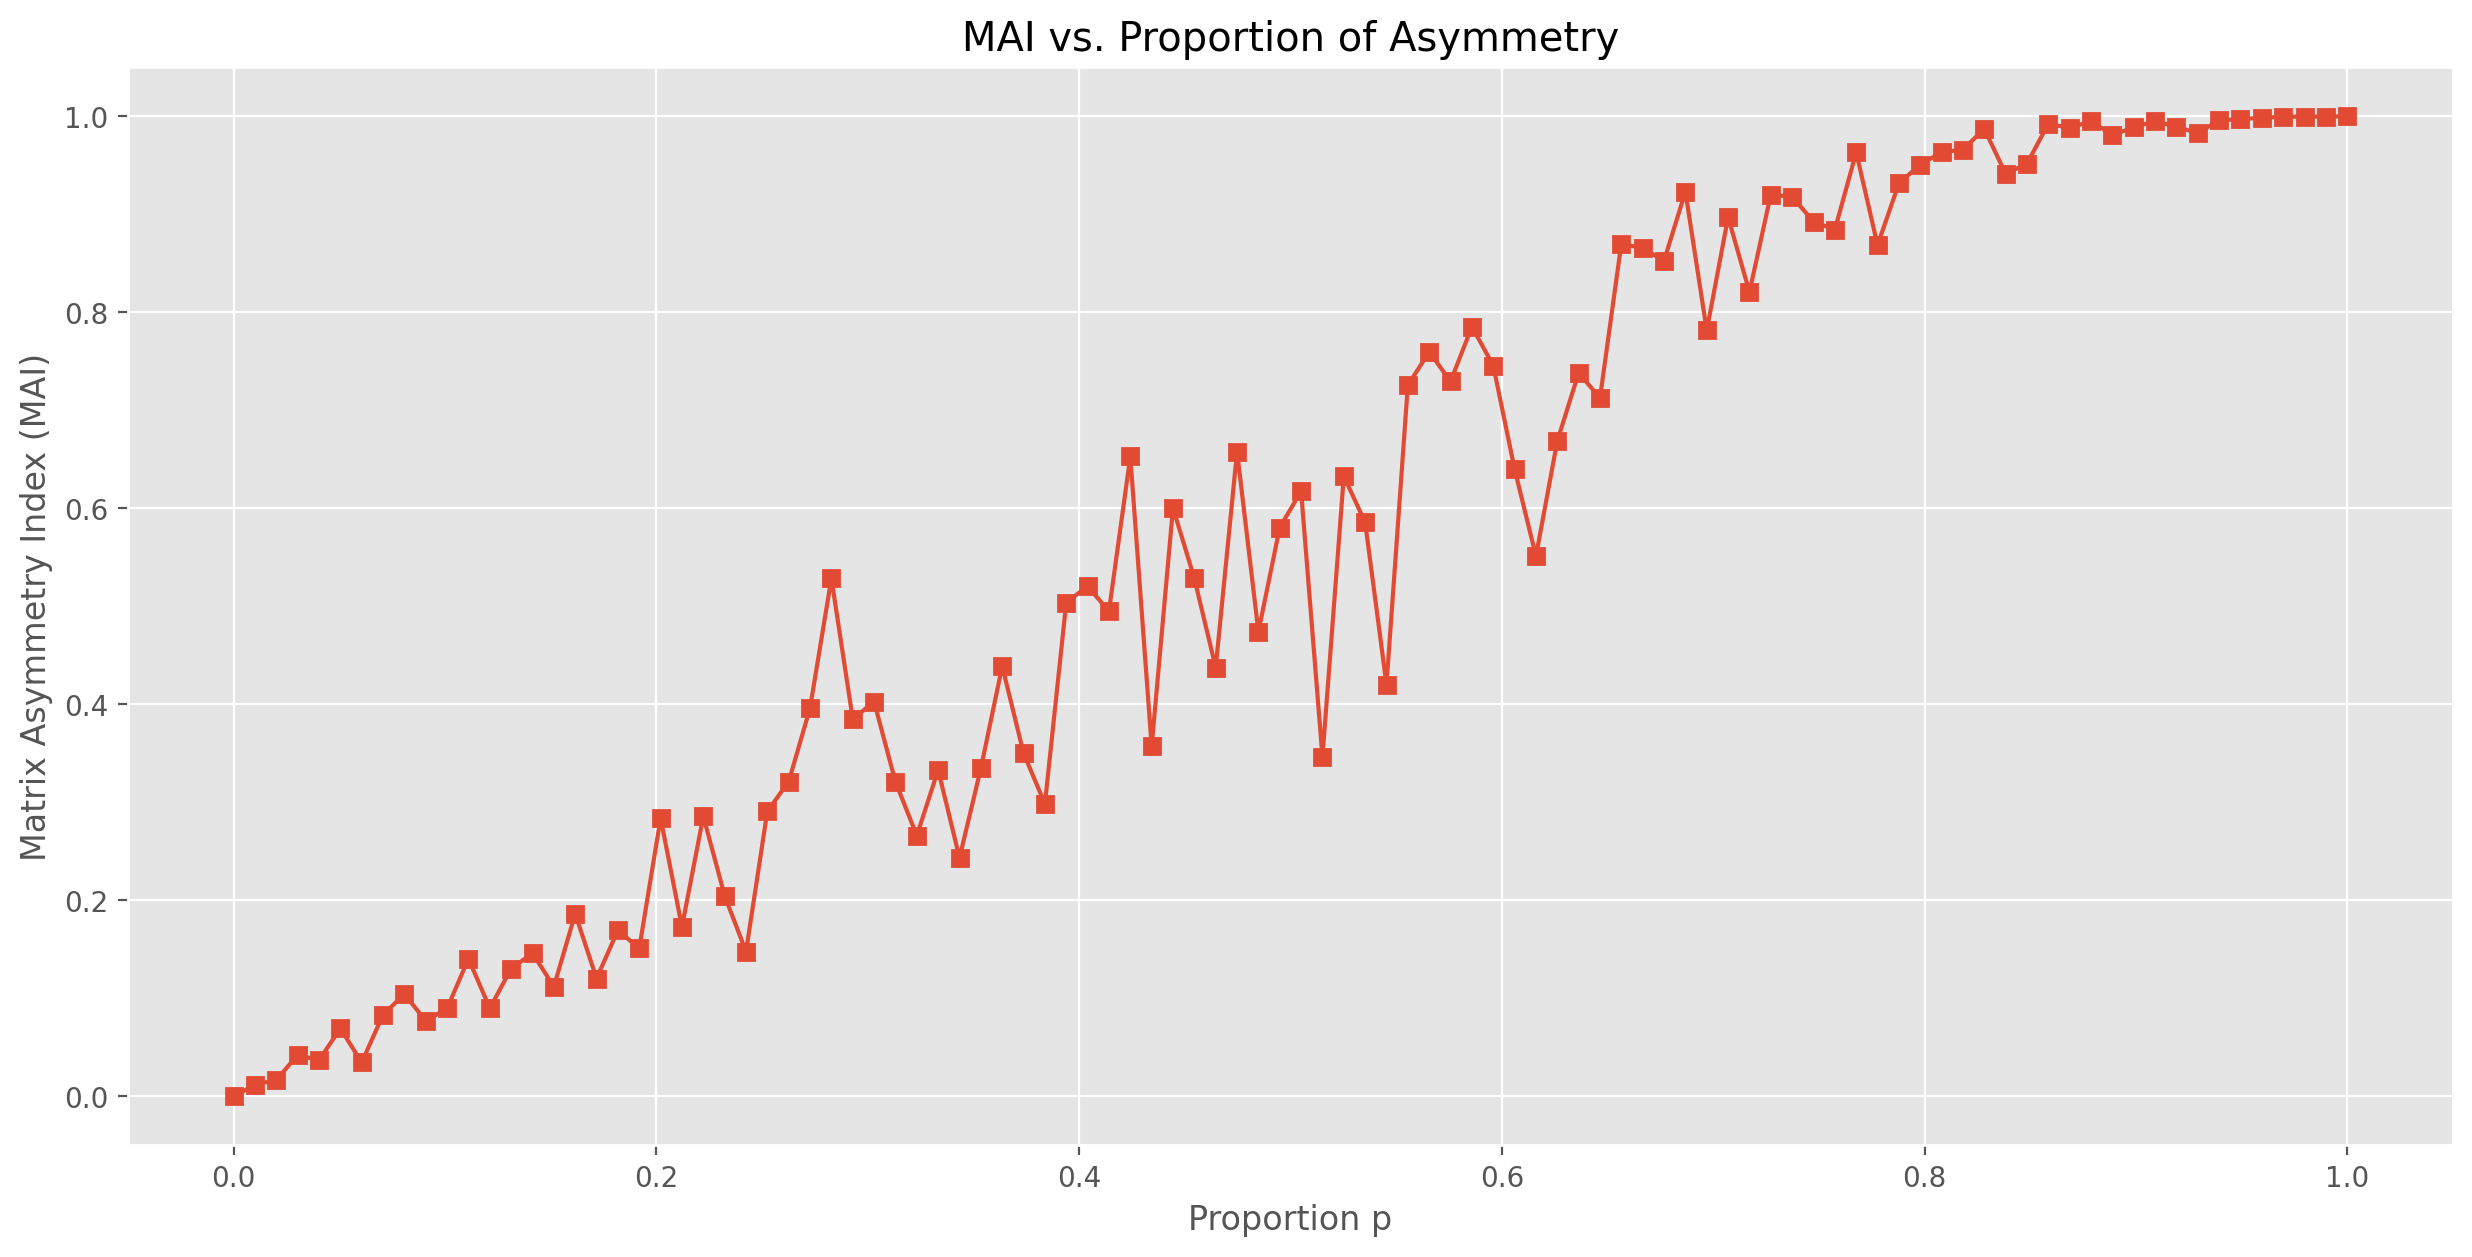

In [26]:
## part 1: implement MAI

# Matrix Asymmetry Index:
def MAI(A):
  # Decomposition:
# Any square matrix A can be decomposed into a symmetric part Asymm
# and an antisymmetric part Aanti as follows:
  Aanti = (A - A.T)/2
  mai = np.linalg.norm(Aanti)/np.linalg.norm(A)
  return mai

## part 2: Compute MAI for symmetric, skew-symmetric, and random matrix

# symmetric matrix:

A = np.random.randn(5,5)
Asymm = (A + A.T)/2
print(Asymm)

symm = MAI(Asymm)
print(symm)

# skewed symmetric matrix:

Aanti = (A - A.T)/2
print(Aanti)

skewed = MAI(Aanti)
print(skewed)

# random matrix:

randomly_generated = MAI(A)
print(A)
print(randomly_generated)

## part 3: formula for mixing skew/symmetric matrices

# B = (1-p)*(A+A.T) + p*(A-A.T)
# B = (1-p)*(A+A.T)/2 + p*(A-A.T)/2
# p=0 # symetric B
# p=1 # skew-symmetric B
p=.9 # assymetric B
B = (1-p)*Asymm + p*Aanti
print(B)

## part 4: test on random matrices

ps = np.linspace(0,1,100)
mai = np.zeros(len(ps))
for i in range(len(ps)):
  # create a matrix
  p = ps[i]
  A = np.random.randn(5,5)
  B = (1-p)*(A+A.T)/2 + p*(A-A.T)/2

  #compute and store the MAI

  mai[i] = MAI(B)

plt.plot(ps, mai, 's-')
plt.xlabel("Proportion p")
plt.ylabel("Matrix Asymmetry Index (MAI)")
plt.title("MAI vs. Proportion of Asymmetry")
plt.show()

In [14]:

def matrix_asymmetry_index(matrix):
    matrix = np.array(matrix)
    n = matrix.shape[0]
    asymmetry_count = 0
    total_count = 0

    for i in range(n):
        for j in range(n):
            if i != j:
                total_count += 1
                if matrix[i, j] != matrix[j, i]:
                    asymmetry_count += 1

    if total_count == 0:
        return 0  # For a 1x1 matrix or if no off-diagonal elements
    return asymmetry_count / total_count

def generate_random_symmetric_matrix(size):
    A = np.random.randint(-10, 10, (size, size))
    return (A + A.T) / 2

def generate_random_skew_symmetric_matrix(size):
    A = np.random.randint(-10, 10, (size, size))
    return (A - A.T) / 2

def mix_matrices(symmetric_matrix, skew_symmetric_matrix, alpha):
    return alpha * symmetric_matrix + (1 - alpha) * skew_symmetric_matrix

# Test with matrices
symmetric_matrix = generate_random_symmetric_matrix(3)
skew_symmetric_matrix = generate_random_skew_symmetric_matrix(3)
random_matrix = np.random.randint(-10, 10, (3, 3))
alpha = 0.5
mixed_matrix = mix_matrices(symmetric_matrix, skew_symmetric_matrix, alpha)

print("Symmetric Matrix:\n", symmetric_matrix)
print("Asymmetry Index for Symmetric Matrix:", matrix_asymmetry_index(symmetric_matrix))
print("\nSkew-Symmetric Matrix:\n", skew_symmetric_matrix)
print("Asymmetry Index for Skew-Symmetric Matrix:", matrix_asymmetry_index(skew_symmetric_matrix))
print("\nRandom Matrix:\n", random_matrix)
print("Asymmetry Index for Random Matrix:", matrix_asymmetry_index(random_matrix))
print("\nMixed Matrix:\n", mixed_matrix)
print("Asymmetry Index of Mixed Matrix:", matrix_asymmetry_index(mixed_matrix))


Symmetric Matrix:
 [[ 5.   5.5 -3.5]
 [ 5.5  1.  -0.5]
 [-3.5 -0.5  5. ]]
Asymmetry Index for Symmetric Matrix: 0.0

Skew-Symmetric Matrix:
 [[ 0.  6.  0.]
 [-6.  0. -1.]
 [ 0.  1.  0.]]
Asymmetry Index for Skew-Symmetric Matrix: 0.6666666666666666

Random Matrix:
 [[ 2  2  5]
 [-3 -3 -6]
 [ 3 -8  1]]
Asymmetry Index for Random Matrix: 1.0

Mixed Matrix:
 [[ 2.5   5.75 -1.75]
 [-0.25  0.5  -0.75]
 [-1.75  0.25  2.5 ]]
Asymmetry Index of Mixed Matrix: 0.6666666666666666


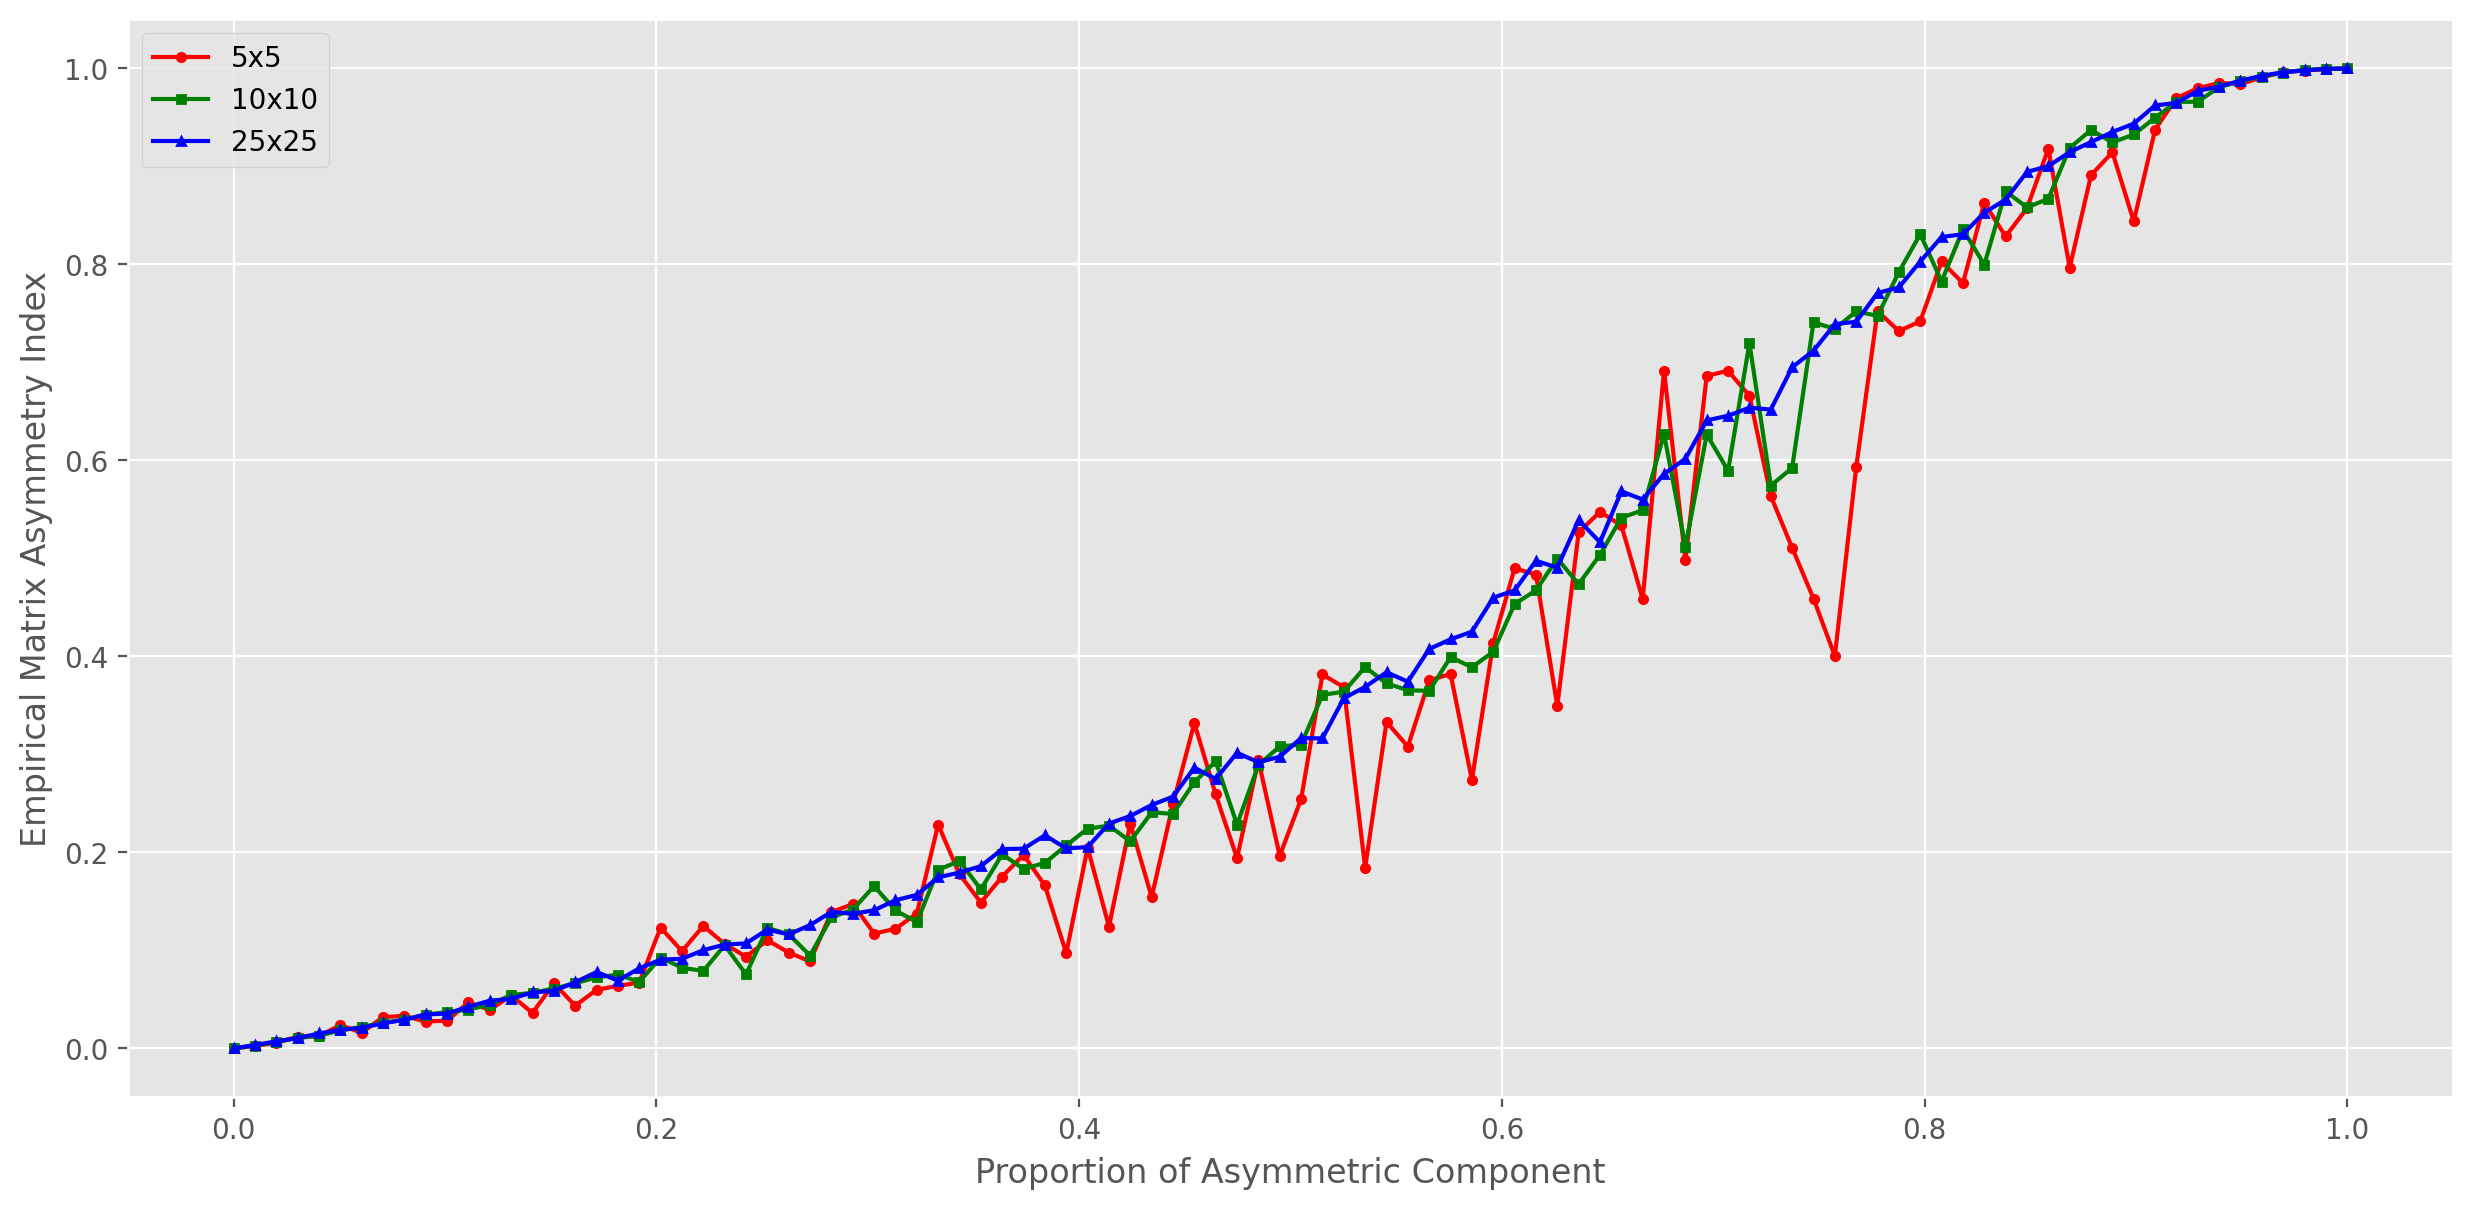

In [15]:

import numpy as np
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

plt.rcParams["figure.figsize"] = (15,7)
plt.rcParams["figure.dpi"] = 200
plt.style.use("ggplot")

np.set_printoptions(suppress=True, precision=2)

def calculate_asymmetry_index(matrix_size, proportion):
    R = np.random.randint(1, 11, (matrix_size, matrix_size))
    R_symmetric = (1 - proportion) * (R + R.T)
    R_asymmetric = proportion * (R - R.T)
    R_combined = R_symmetric + R_asymmetric

    asymmetry_index = np.linalg.norm(R_asymmetric, "fro") / np.linalg.norm(R_combined, "fro")
    return asymmetry_index

proportions = np.linspace(0, 1, 100)
matrix_sizes = [5, 10, 25]
colors = ['r', 'g', 'b']
markers = ['o', 's', '^']
labels = ["5x5", "10x10", "25x25"]

# Store asymmetry indices for different sizes
asymmetry_indices = {size: [] for size in matrix_sizes}

for p in proportions:
    for size in matrix_sizes:
        asymmetry_indices[size].append(calculate_asymmetry_index(size, p))

# Plotting
for size, color, marker, label in zip(matrix_sizes, colors, markers, labels):
    plt.plot(proportions, asymmetry_indices[size], marker=marker, markersize=3, color=color, label=label)

plt.xlabel("Proportion of Asymmetric Component")
plt.ylabel("Empirical Matrix Asymmetry Index")
plt.legend()
plt.show()
